# Pipeline Tests #2

In [1]:
%run s5p_no2_tools.py

## Load Sjoined GeoDataFrames

In [2]:
import pandas as pd
import geopandas as gpd

In [3]:
with open('filelist.txt', 'r') as f:
    file = f.read()
    filelist = file.split('\n')
    
filelist

['data/S5P_OFFL_L2__NO2____20200101T142446_20200101T160616_11495_01_010302_20200103T065547_sjoin.pickle',
 'data/S5P_OFFL_L2__NO2____20200101T124316_20200101T142446_11494_01_010302_20200103T054233_sjoin.pickle',
 'data/S5P_OFFL_L2__NO2____20200101T110146_20200101T124316_11493_01_010302_20200103T041218_sjoin.pickle',
 'data/S5P_OFFL_L2__NO2____20200101T092016_20200101T110146_11492_01_010302_20200103T021108_sjoin.pickle']

## Load Level 1 and Level 0 GeoDataFrames derived from GADM

In [4]:
africa1_gdf = pd.read_pickle('data/africa1_gdf.pickle')

In [5]:
africa0_gdf = pd.read_pickle('data/africa0_gdf.pickle')

In [6]:
africa0_gdf

,GID_0,NAME_0,geometry,name,alpha-2,iso3,country-code,iso_3166-2,region,sub-region,intermediate-region,region-code,sub-region-code,intermediate-region-code
2,AGO,Angola,"MULTIPOLYGON (((11.73347 -16.67255, 11.73347 -...",Angola,AO,AGO,24,ISO 3166-2:AO,Africa,Sub-Saharan Africa,Middle Africa,2.0,202.0,17.0
12,ATF,French Southern Territories,"MULTIPOLYGON (((68.86333 -50.01889, 68.86166 -...",French Southern Territories,TF,ATF,260,ISO 3166-2:TF,Africa,Sub-Saharan Africa,Eastern Africa,2.0,202.0,14.0
17,BDI,Burundi,"POLYGON ((30.80741 -3.27204, 30.80261 -3.27333...",Burundi,BI,BDI,108,ISO 3166-2:BI,Africa,Sub-Saharan Africa,Eastern Africa,2.0,202.0,14.0
19,BEN,Benin,"MULTIPOLYGON (((1.94153 6.30014, 1.94153 6.300...",Benin,BJ,BEN,204,ISO 3166-2:BJ,Africa,Sub-Saharan Africa,Western Africa,2.0,202.0,11.0
21,BFA,Burkina Faso,"POLYGON ((0.76395 10.99731, 0.75827 10.99736, ...",Burkina Faso,BF,BFA,854,ISO 3166-2:BF,Africa,Sub-Saharan Africa,Western Africa,2.0,202.0,11.0
37,BWA,Botswana,"POLYGON ((21.78464 -26.71760, 21.78483 -26.717...",Botswana,BW,BWA,72,ISO 3166-2:BW,Africa,Sub-Saharan Africa,Southern Africa,2.0,202.0,18.0
38,CAF,Central African Republic,"POLYGON ((26.52326 6.10764, 26.52429 6.10514, ...",Central African Republic,CF,CAF,140,ISO 3166-2:CF,Africa,Sub-Saharan Africa,Middle Africa,2.0,202.0,17.0
44,CIV,Côte d'Ivoire,"MULTIPOLYGON (((-6.66930 4.72958, -6.66930 4.7...",Côte d'Ivoire,CI,CIV,384,ISO 3166-2:CI,Africa,Sub-Saharan Africa,Western Africa,2.0,202.0,11.0
45,CMR,Cameroon,"MULTIPOLYGON (((11.37716 2.29688, 11.37720 2.2...",Cameroon,CM,CMR,120,ISO 3166-2:CM,Africa,Sub-Saharan Africa,Middle Africa,2.0,202.0,17.0
46,COD,Democratic Republic of the Congo,"MULTIPOLYGON (((12.21014 -5.78431, 12.21014 -5...","Congo, Democratic Republic of the",CD,COD,180,ISO 3166-2:CD,Africa,Sub-Saharan Africa,Middle Africa,2.0,202.0,17.0


In [7]:
africa1_gdf

,GID_0,NAME_0,GID_1,NAME_1,VARNAME_1,NL_NAME_1,TYPE_1,ENGTYPE_1,CC_1,HASC_1,...,alpha-2,iso3,country-code,iso_3166-2,region,sub-region,intermediate-region,region-code,sub-region-code,intermediate-region-code
34,AGO,Angola,AGO.1_1,Bengo,None,None,Província,Province,1,AO.BO,...,AO,AGO,24,ISO 3166-2:AO,Africa,Sub-Saharan Africa,Middle Africa,2.0,202.0,17.0
35,AGO,Angola,AGO.2_1,Benguela,Benguella,None,Província,Province,2,AO.BG,...,AO,AGO,24,ISO 3166-2:AO,Africa,Sub-Saharan Africa,Middle Africa,2.0,202.0,17.0
36,AGO,Angola,AGO.3_1,Bié,None,None,Província,Province,3,AO.BI,...,AO,AGO,24,ISO 3166-2:AO,Africa,Sub-Saharan Africa,Middle Africa,2.0,202.0,17.0
37,AGO,Angola,AGO.4_1,Cabinda,None,None,Província,Province,4,AO.CB,...,AO,AGO,24,ISO 3166-2:AO,Africa,Sub-Saharan Africa,Middle Africa,2.0,202.0,17.0
38,AGO,Angola,AGO.5_1,Cuando Cubango,None,None,Província,Province,5,AO.CC,...,AO,AGO,24,ISO 3166-2:AO,Africa,Sub-Saharan Africa,Middle Africa,2.0,202.0,17.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3591,ZWE,Zimbabwe,ZWE.6_1,Mashonaland West,None,None,Province,Province,None,ZW.MW,...,ZW,ZWE,716,ISO 3166-2:ZW,Africa,Sub-Saharan Africa,Eastern Africa,2.0,202.0,14.0
3592,ZWE,Zimbabwe,ZWE.7_1,Masvingo,None,None,Province,Province,None,ZW.MV,...,ZW,ZWE,716,ISO 3166-2:ZW,Africa,Sub-Saharan Africa,Eastern Africa,2.0,202.0,14.0
3593,ZWE,Zimbabwe,ZWE.8_1,Matabeleland North,None,None,Province,Province,None,ZW.MN,...,ZW,ZWE,716,ISO 3166-2:ZW,Africa,Sub-Saharan Africa,Eastern Africa,2.0,202.0,14.0
3594,ZWE,Zimbabwe,ZWE.9_1,Matabeleland South,None,None,Province,Province,None,ZW.MS,...,ZW,ZWE,716,ISO 3166-2:ZW,Africa,Sub-Saharan Africa,Eastern Africa,2.0,202.0,14.0


## Prepare plots for selected country

Using 1 swaths.


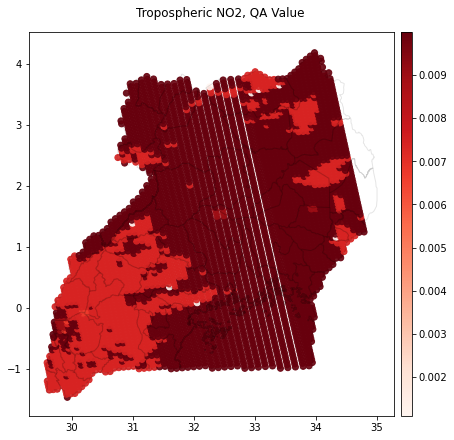

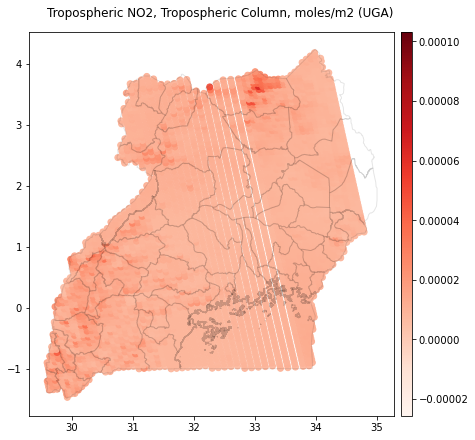

In [8]:
plot_maps(iso3='UGA', filter_gdf=africa1_gdf, filelist=filelist, colormap='Reds')